In [1]:
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D
from keras.models import Sequential
from keras.callbacks import TensorBoard
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import time

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read Data
data = pd.read_csv('UrbanSounds8K/metadata/UrbanSound8K.csv')
data.head(5)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [3]:
data.shape

(8732, 8)

In [4]:
# Get data over 3 seconds long
valid_data = data[['slice_file_name', 'fold' ,'classID', 'class']][ data['end']-data['start'] >= 3 ]
valid_data.shape

(7468, 4)

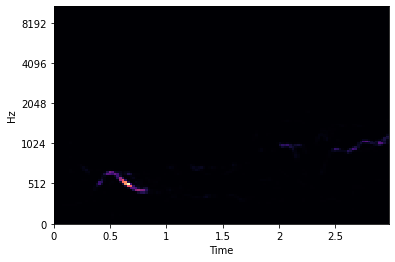

In [5]:
y, sr = librosa.load('UrbanSounds8K/audio/fold9/13579-2-0-16.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

mel_sgram = librosa.amplitude_to_db(ps, ref=np.min)

librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [6]:
valid_data['path'] = 'fold' + valid_data['fold'].astype('str') + '/' + valid_data['slice_file_name'].astype('str')

In [7]:
class StopExecution(Exception):
    def _render_traceback_(self):
        pass

raise StopExecution

StopExecution: 

## Data Augmentation

### 1. Vary Time

In [8]:
import soundfile as sf

In [ ]:
y, sr = librosa.load('UrbanSounds8K/audio/fold1/14113-4-0-1.wav', duration=2.97)
y_changed = librosa.effects.time_stretch(y, rate=0.81)
sf.write('UrbanSounds8K/augmented/fold1/speed_81/14113-4-0-1.wav' ,y_changed, sr)

In [12]:
"""
import os
for i in range(1,11):
    print(i)
    path = "UrbanSounds8K/augmented/ps2_25/fold" + str(i) 
    os.mkdir(path)
"""


1
2
3
4
5
6
7
8
9
10


In [ ]:
rate = 0.81 # replace with 0.81 and execute again

for row in valid_data.itertuples():
    i+=1
    print(i)
    y, sr = librosa.load('UrbanSounds8K/audio/' + row.path) 
    print('UrbanSounds8K/audio/' + row.path)
    y_changed = librosa.effects.time_stretch(y, rate=rate)
    sf.write('UrbanSounds8K/augmented/fold' + str(row.fold) +'/speed_81/'+ row.slice_file_name ,y_changed, sr)

NameError: name 'i' is not defined

In [ ]:
rate = 1.07 # replace with 0.81 and execute again

for row in valid_data.itertuples():
    i+=1
    print(i)
    y, sr = librosa.load('UrbanSounds8K/audio/' + row.path)
    print('UrbanSounds8K/audio/' + row.path)  
    y_changed = librosa.effects.time_stretch(y, rate=rate)
    sf.write('UrbanSounds8K/augmented/fold' + str(row.fold) +'/speed_107/'+ row.slice_file_name ,y_changed, sr)

### 2. Vary pitch

In [14]:
n_steps = 2 #-1, -2, 2, 1
i=0
for row in valid_data.itertuples():
    i+=1
    print(i)
    y, sr = librosa.load('UrbanSounds8K/audio/' + row.path)
    print('UrbanSounds8K/audio/' + row.path)  
    y_changed = librosa.effects.pitch_shift(y, sr, n_steps=n_steps)
    sf.write('UrbanSounds8K/augmented/ps1_2/fold' + str(row.fold) +'/'+ row.slice_file_name ,y_changed, sr)

1
UrbanSounds8K/audio/fold5/100263-2-0-117.wav
2
UrbanSounds8K/audio/fold5/100263-2-0-121.wav
3
UrbanSounds8K/audio/fold5/100263-2-0-126.wav
4
UrbanSounds8K/audio/fold5/100263-2-0-137.wav
5
UrbanSounds8K/audio/fold5/100263-2-0-143.wav
6
UrbanSounds8K/audio/fold5/100263-2-0-161.wav
7
UrbanSounds8K/audio/fold5/100263-2-0-3.wav
8
UrbanSounds8K/audio/fold5/100263-2-0-36.wav
9
UrbanSounds8K/audio/fold2/100652-3-0-0.wav
10
UrbanSounds8K/audio/fold2/100652-3-0-1.wav
11
UrbanSounds8K/audio/fold2/100652-3-0-2.wav
12
UrbanSounds8K/audio/fold2/100652-3-0-3.wav
13
UrbanSounds8K/audio/fold10/100795-3-0-0.wav
14
UrbanSounds8K/audio/fold10/100795-3-1-0.wav
15
UrbanSounds8K/audio/fold10/100795-3-1-1.wav
16
UrbanSounds8K/audio/fold10/100795-3-1-2.wav
17
UrbanSounds8K/audio/fold5/100852-0-0-0.wav
18
UrbanSounds8K/audio/fold5/100852-0-0-1.wav
19
UrbanSounds8K/audio/fold5/100852-0-0-10.wav
20
UrbanSounds8K/audio/fold5/100852-0-0-11.wav
21
UrbanSounds8K/audio/fold5/100852-0-0-12.wav
22
UrbanSounds8K/audio/

### 3. Change Pitch (PS2)

In [16]:
n_steps = -2.5 #-2.5, -3.5, 2.5, 3.5
i=0
for row in valid_data.itertuples():
    
    i+=1
    print(i)
    y, sr = librosa.load('UrbanSounds8K/audio/' + row.path)
    print('UrbanSounds8K/audio/' + row.path)  
    y_changed = librosa.effects.pitch_shift(y, sr, n_steps=n_steps)
    sf.write('UrbanSounds8K/augmented/ps2_m25/fold' + str(row.fold) +'/'+ row.slice_file_name ,y_changed, sr)

1
UrbanSounds8K/audio/fold5/100263-2-0-117.wav
2
UrbanSounds8K/audio/fold5/100263-2-0-121.wav
3
UrbanSounds8K/audio/fold5/100263-2-0-126.wav
4
UrbanSounds8K/audio/fold5/100263-2-0-137.wav
5
UrbanSounds8K/audio/fold5/100263-2-0-143.wav
6
UrbanSounds8K/audio/fold5/100263-2-0-161.wav
7
UrbanSounds8K/audio/fold5/100263-2-0-3.wav
8
UrbanSounds8K/audio/fold5/100263-2-0-36.wav
9
UrbanSounds8K/audio/fold2/100652-3-0-0.wav
10
UrbanSounds8K/audio/fold2/100652-3-0-1.wav
11
UrbanSounds8K/audio/fold2/100652-3-0-2.wav
12
UrbanSounds8K/audio/fold2/100652-3-0-3.wav
13
UrbanSounds8K/audio/fold10/100795-3-0-0.wav
14
UrbanSounds8K/audio/fold10/100795-3-1-0.wav
15
UrbanSounds8K/audio/fold10/100795-3-1-1.wav
16
UrbanSounds8K/audio/fold10/100795-3-1-2.wav
17
UrbanSounds8K/audio/fold5/100852-0-0-0.wav
18
UrbanSounds8K/audio/fold5/100852-0-0-1.wav
19
UrbanSounds8K/audio/fold5/100852-0-0-10.wav
20
UrbanSounds8K/audio/fold5/100852-0-0-11.wav
21
UrbanSounds8K/audio/fold5/100852-0-0-12.wav
22
UrbanSounds8K/audio/